In [1]:
import numpy as np
from skimage import io
from skimage.draw import ellipse
import os
import copy

import matplotlib.pyplot as plt
%matplotlib inline

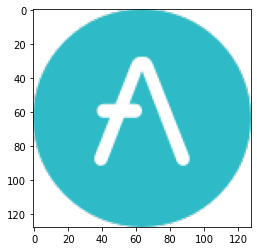

In [2]:
border_width = 3
name = "aave"
# load icon
icon = io.imread("./tmp/"+name+".png")
plt.imshow(icon)

In [3]:
def get_most_frequent_color(a):
    colors, count = np.unique(a.reshape(-1,a.shape[-1]), axis=0, return_counts=True)
    return colors[count.argmax()]

In [4]:
def add_ring(img, offset, width, color):
    image = copy.deepcopy(img)
    image_size = len(image)
    orr, occ = ellipse(image_size/2, image_size/2, offset+width, offset+width, shape=[image_size,image_size])
    irr, icc = ellipse(image_size/2, image_size/2, offset, offset, shape=[image_size,image_size])
    mask = np.zeros((image_size, image_size), dtype=np.uint8)
    mask[orr, occ] = 1
    mask[irr, icc] = 0
    # plt.imshow(mask, cmap='gray')
    image[mask==1] = color
    return(image)

def circle_icon_to_square_icon(img, inset=2):
    image = copy.deepcopy(img)
    image_size = len(image)
    dominant_color = get_most_frequent_color(image)
    image = add_ring(image, image_size/2-inset, image_size, dominant_color)
    return(image)
    

In [5]:
def add_white_rect_border(img, width=3):
    image = copy.deepcopy(img)
    white = [255, 255, 255, 255]
    image_size = len(image)
    image[0:width, :] = white
    image[(image_size-width):image_size, :] = white
    image[:, 0:width] = white
    image[:, (image_size-width):image_size] = white
    return(image)

In [6]:
def add_white_circ_border(img, width=3):
    image = copy.deepcopy(img)
    image = add_ring(image, len(icon)/2-width, width+1, 1)
    image = add_ring(image, len(icon)/2-width, width, [255, 255, 255, 255])
    return(image)

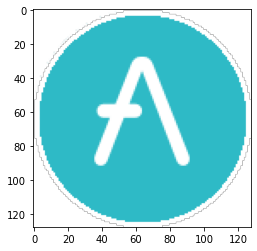

In [7]:
circle_border_icon = add_white_circ_border(icon)
plt.imshow(circle_border_icon)
    
io.imsave("./tmp/"+name+"_EOA.png", circle_border_icon)

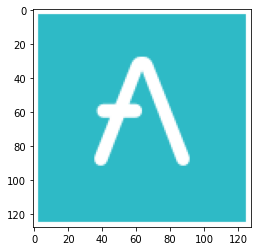

In [8]:
bordered_square_icon = add_white_rect_border(circle_icon_to_square_icon(icon))
plt.imshow(bordered_square_icon)
io.imsave("./tmp/"+name+"_contract.png", bordered_square_icon)